In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#load data 
X, Y = load_data()
print("Shape X:", X.shape)
print("Shape Y:", Y.shape)
print(f"\nThe first element of X is : {X[0]}")

Shape X: (1000, 400)
Shape Y: (1000, 1)

The first element of X is : [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.0

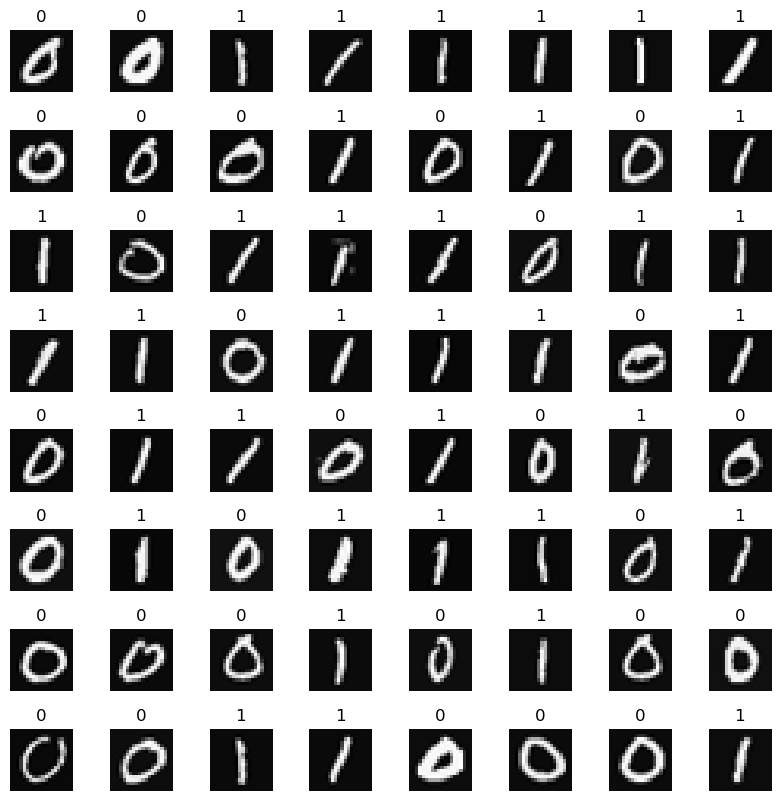

In [4]:
m, n = X.shape
fig, axes = plt.subplots(8, 8, figsize = (8, 8))
fig.tight_layout(pad=0.1)
for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)

    X_random_reshaped = X[random_index].reshape((20, 20)).T

    ax.imshow(X_random_reshaped, cmap='gray')

    ax.set_title(Y[random_index, 0])
    ax.set_axis_off()

In [5]:
model = Sequential([
    tf.keras.Input(shape = (400,)),
    Dense(units = 25, activation = "sigmoid"),
    Dense(units = 15, activation = "sigmoid"),
    Dense(units = 1, activation = "sigmoid")], name = "hand_rec_model")

In [6]:
model.summary()

Model: "hand_rec_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                10025     
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 10,431
Trainable params: 10,431
Non-trainable params: 0
_________________________________________________________________


In [7]:
[layer1, layer2, layer3] = model.layers

In [8]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


In [9]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(), 
    optimizer=tf.keras.optimizers.Adam(0.001),)
model.fit(X, Y, epochs = 20)

Epoch 1/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6375
Epoch 2/20
32/32 [==============================] - 0s 1ms/step - loss: 0.4808
Epoch 3/20
32/32 [==============================] - 0s 1ms/step - loss: 0.3265
Epoch 4/20
32/32 [==============================] - 0s 1ms/step - loss: 0.2181
Epoch 5/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1559
Epoch 6/20
32/32 [==============================] - 0s 1ms/step - loss: 0.1193
Epoch 7/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0957
Epoch 8/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0795
Epoch 9/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0677
Epoch 10/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0584
Epoch 11/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0513
Epoch 12/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0455
Epoch 13/20
32/32 [==============================

In [10]:
prediction = model.predict(X[0].reshape(1,400))  # a zero
print(f" predicting a zero: {prediction}")
prediction = model.predict(X[500].reshape(1,400))  # a one
print(f" predicting a one:  {prediction}")

1/1 [==============================] - 0s 62ms/step
 predicting a zero: [[0.02500169]]
1/1 [==============================] - 0s 20ms/step
 predicting a one:  [[0.98913056]]
